In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import sys

In [4]:
df = pd.read_csv('new_hps6.csv')
for index, row in df.iterrows():
    if row['state_metropolitan'] == 'metropolitan':
        df.at[index,'state_metropolitan'] = 1
    else:
        df.at[index,'state_metropolitan'] = 0
        
del df["teach_indivisualstudy"]
del df["Week"]
X = df.iloc[:,2:22]
y = df.iloc[:,-1] 

[0.03868786 0.         0.07405706 0.07728671 0.0217941  0.04848915
 0.08806602 0.08383723 0.08237478 0.09109172 0.03503435 0.15240339
 0.02567306 0.01078473 0.0186239  0.00996403 0.00603713 0.04362055
 0.08584614 0.00632808]


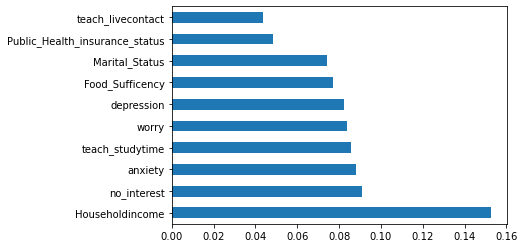

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [6]:
X = df[[ "Householdincome", "teach_studytime", "teach_livecontact", "anxiety", "worry", "Marital_Status", "Food_Sufficency", "no_interest","depression","Public_Health_insurance_status"]].to_numpy()
y = df[['whether_study']].to_numpy()
y = np.ravel(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
from sklearn.tree import DecisionTreeClassifier
tree_train_list = []
index = []
tree_test_list = []
for i in range(100):
    index.append(i+ 1)
    tree = DecisionTreeClassifier(max_depth=i + 1)
    tree.fit(X_train, y_train)
    tree_test_list.append(tree.score(X_test, y_test)) 
    tree_train_list.append(tree.score(X_train, y_train)) 

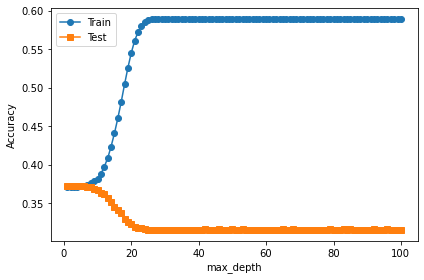

In [8]:
plt.plot(index, tree_train_list, marker='o', label='Train')
plt.plot(index, tree_test_list, marker='s', label='Test')
plt.legend(loc='best', numpoints=1)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.tight_layout()

In [9]:
from sklearn.model_selection import GridSearchCV
tree = DecisionTreeClassifier(random_state=123)

new_list = [None]
for i in range(20):
    new_list.append(i+1)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': new_list
}

gs = GridSearchCV(estimator=tree,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10)

gs.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params: %s' % gs.best_params_)
print('Test Accuracy: %.2f%%' % (gs.best_estimator_.score(X_test, y_test)*100))

Best Accuracy: 37.20%
Best Params: {'criterion': 'gini', 'max_depth': 6}
Test Accuracy: 37.21%


In [10]:
y_pred_tree = gs.best_estimator_.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
tree_conf = confusion_matrix(y_test, y_pred_tree)
print(tree_conf)
print(classification_report(y_test, y_pred_tree))


[[19741  1346     0     0     0     0     0     0]
 [13381  1330     0     0     0     0     0     0]
 [ 7835   965     0     0     0     0     0     0]
 [ 2440   373     0     0     0     0     0     0]
 [ 2788   475     0     0     0     0     0     0]
 [ 3506   681     0     0     0     0     0     0]
 [  489   138     0     0     0     0     0     0]
 [  973   170     0     0     0     0     0     0]]
              precision    recall  f1-score   support

           1       0.39      0.94      0.55     21087
           2       0.24      0.09      0.13     14711
           3       0.00      0.00      0.00      8800
           4       0.00      0.00      0.00      2813
           5       0.00      0.00      0.00      3263
           6       0.00      0.00      0.00      4187
           7       0.00      0.00      0.00       627
           8       0.00      0.00      0.00      1143

    accuracy                           0.37     56631
   macro avg       0.08      0.13      0.08     5

/Users/jiayigao/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jiayigao/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jiayigao/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
